In [1]:
import pandas as pd 
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [29]:
df = pd.read_csv('owid-covid-data.csv')

In [30]:
europe_df = df.loc[df.continent == "Europe"]

europe_df = europe_df.drop(["continent", "iso_code"], axis=1)

## after second wave, before spread of new UK variant
mask = (europe_df['date'] >= "2020-06-01") & (europe_df['date'] < "2020-12-01")
europe_df = europe_df.loc[mask] 

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
400,Albania,2020-06-01,1143.0,6.0,19.857,33.0,0.0,0.143,397.178,2.085,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
401,Albania,2020-06-02,1164.0,21.0,19.286,33.0,0.0,0.000,404.476,7.297,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
402,Albania,2020-06-03,1184.0,20.0,19.143,33.0,0.0,0.000,411.425,6.950,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
403,Albania,2020-06-04,1197.0,13.0,17.286,33.0,0.0,0.000,415.943,4.517,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
404,Albania,2020-06-05,1212.0,15.0,16.143,33.0,0.0,0.000,421.155,5.212,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785


In [126]:
outlier_countries = ["Andorra", 
                    "Monaco", 
                    "Iceland", 
                    "Ireland",
                    "San Marino",
                    "Cyprus",
                    "Vatican"]

europe_df = europe_df[~europe_df['location'].isin(outlier_countries)]
europe_df = europe_df.set_index("date")


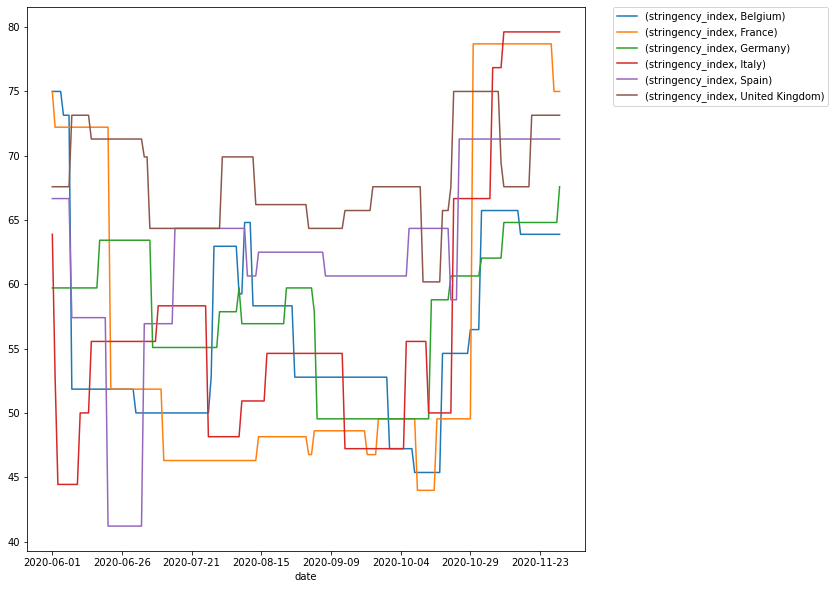

In [79]:
test_countries = ["Germany", 
                  "France", 
                  "United Kingdom", 
                  "Spain", 
                  "Italy",
                  "Belgium"]

stringency_df = europe_df[["stringency_index", "location"]].copy()

stringency_df = stringency_df[stringency_df['location'].isin(test_countries)]

stringency_df = stringency_df.reset_index()
stringency_df = stringency_df.set_index(["date", "location"])

tests_df = stringency_df.unstack()
tests_df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Deaths/Stringency Lag')

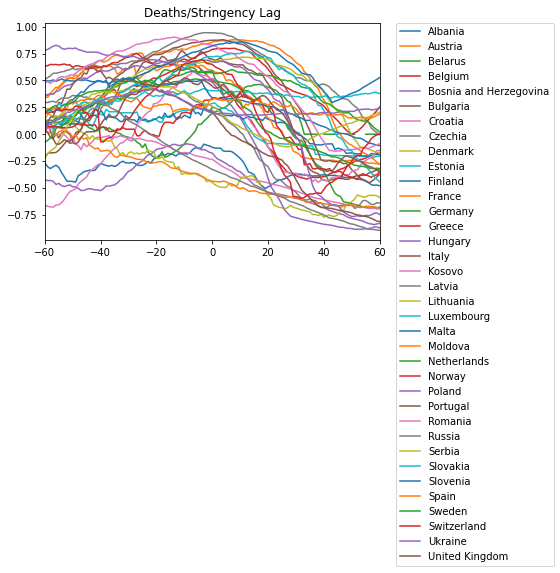

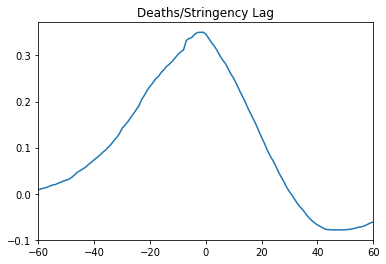

In [100]:
max_lag = 60
country_df = europe_df.copy()
for country in europe_df.location.unique():
    if country not in ["Liechtenstein", "Montenegro", "North Macedonia"]:
        country_df = europe_df[europe_df["location"] == country].copy()
        lag_corr = []
        lag = []
        for k in range(-max_lag,max_lag+1):
            lag_df = country_df.shift(k)
            lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["stringency_index"]))
            lag.append(k)

        plt.plot(lag, lag_corr, label="{}".format(country))    
        plt.xlim(-max_lag,max_lag)
plt.title("Deaths/Stringency Lag")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## average
country_df = europe_df.copy()
lag_corr = []
lag = []
for k in range(-max_lag,max_lag+1):
    lag_df = country_df.shift(k)
    lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["stringency_index"]))
    lag.append(k)
plt.figure()
plt.plot(lag, lag_corr)    
plt.xlim(-max_lag,max_lag)
plt.title("Deaths/Stringency Lag")

## they are the most correlated around 2 days different.
## when stringency goes up, deaths go up 2 days later - 0.35
## average correlation not great but can analyse specific countries where it is correlated


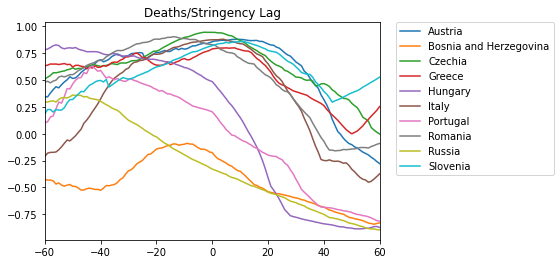

In [104]:
## countries with correlation >0.8 or <-0.8
max_lag = 60
country_df = europe_df.copy()
for country in europe_df.location.unique():# test_countries:
    if country not in ["Liechtenstein", "Montenegro", "North Macedonia"]:
        country_df = europe_df[europe_df["location"] == country].copy()
        lag_corr = []
        lag = []
        for k in range(-max_lag,max_lag+1):
            lag_df = country_df.shift(k)
            lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["stringency_index"]))
            lag.append(k)
        if max(lag_corr) > 0.8 or min(lag_corr) < -0.8:
            plt.plot(lag, lag_corr, label="{}".format(country))    
            plt.xlim(-max_lag,max_lag)

plt.title("Deaths/Stringency Lag")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


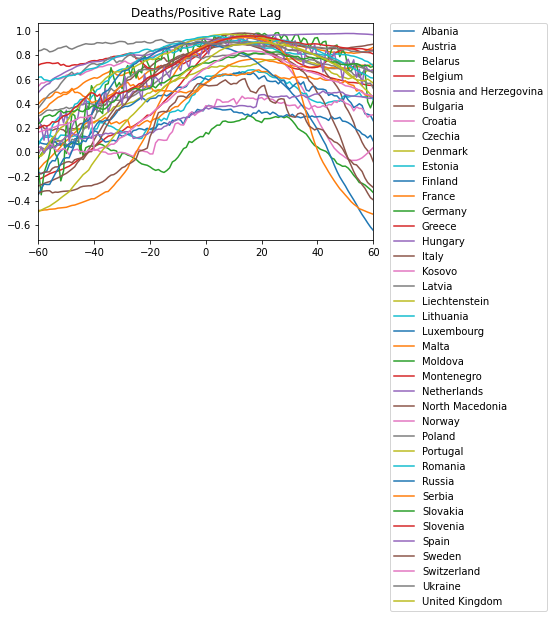

In [108]:
for country in europe_df.location.unique():
    country_df = europe_df[europe_df["location"] == country].copy()
    lag_corr = []
    lag = []
    max_lag = 60
    for k in range(-max_lag,max_lag+1):
        lag_df = country_df.shift(k)
        lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["positive_rate"]))
        lag.append(k)

    plt.plot(lag, lag_corr, label="{}".format(country))    
    plt.xlim(-max_lag,max_lag)
plt.title("Deaths/Positive Rate Lag")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(-14.0, 14.0)

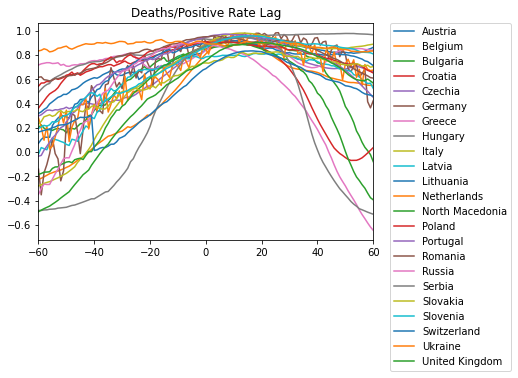

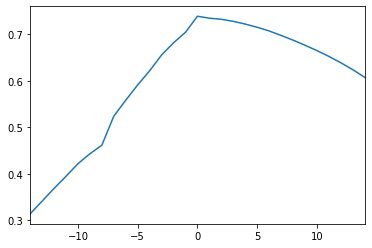

In [117]:
no_data = ["Albania", "Bosnia and Herzegovina",
          "Kosovo", "Liechtenstein",
           "Moldova", "Montenegro"]

for country in europe_df.location.unique():
    if country not in no_data:
        country_df = europe_df[europe_df["location"] == country].copy()
        lag_corr = []
        lag = []
        max_lag = 60
        for k in range(-max_lag,max_lag+1):
            lag_df = country_df.shift(k)
            lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["positive_rate"]))
            lag.append(k)
        if max(lag_corr) > 0.8 or min(lag_corr) < -0.8:
            plt.plot(lag, lag_corr, label="{}".format(country))    
            plt.xlim(-max_lag,max_lag)

plt.title("Deaths/Positive Rate Lag")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# ## average
max_lag = 14 
country_df = europe_df.copy()
lag_corr = []
lag = []
for k in range(-max_lag,max_lag+1):
    lag_df = country_df.shift(k)
    lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["positive_rate"]))
    lag.append(k)
plt.figure()
plt.plot(lag, lag_corr)    
plt.xlim(-max_lag,max_lag)

(-14.0, 14.0)

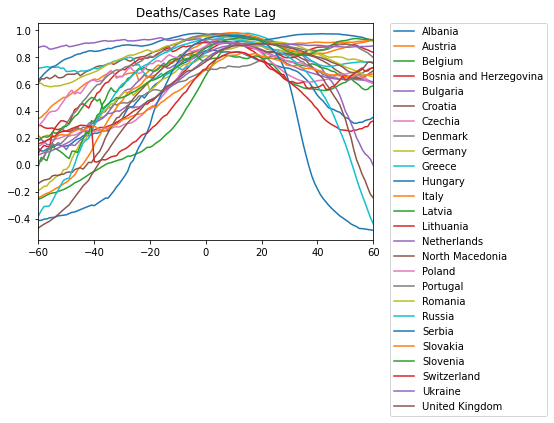

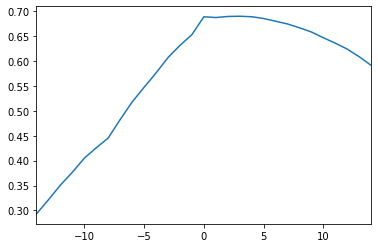

In [123]:
no_data = []
for country in europe_df.location.unique():
    if country not in no_data:
        country_df = europe_df[europe_df["location"] == country].copy()
        lag_corr = []
        lag = []
        max_lag = 60
        for k in range(-max_lag,max_lag+1):
            lag_df = country_df.shift(k)
            lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["new_cases_smoothed_per_million"]))
            lag.append(k)
        if max(lag_corr) > 0.8 or min(lag_corr) < -0.8:
            plt.plot(lag, lag_corr, label="{}".format(country))    
            plt.xlim(-max_lag,max_lag)

plt.title("Deaths/Cases Rate Lag")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# ## average
max_lag = 14 
country_df = europe_df.copy()
lag_corr = []
lag = []
for k in range(-max_lag,max_lag+1):
    lag_df = country_df.shift(k)
    lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["new_cases_smoothed_per_million"]))
    lag.append(k)
plt.figure()
plt.plot(lag, lag_corr)    
plt.xlim(-max_lag,max_lag)

(-14.0, 14.0)

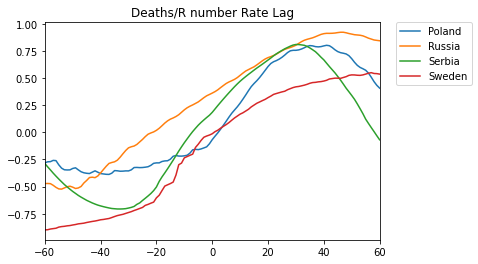

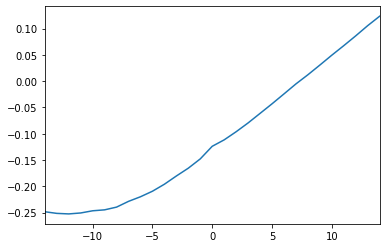

In [124]:
no_data = []
for country in europe_df.location.unique():
    if country not in no_data:
        country_df = europe_df[europe_df["location"] == country].copy()
        lag_corr = []
        lag = []
        max_lag = 60
        for k in range(-max_lag,max_lag+1):
            lag_df = country_df.shift(k)
            lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["reproduction_rate"]))
            lag.append(k)
        if max(lag_corr) > 0.8 or min(lag_corr) < -0.8:
            plt.plot(lag, lag_corr, label="{}".format(country))    
            plt.xlim(-max_lag,max_lag)

plt.title("Deaths/R number Rate Lag")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# ## average
max_lag = 14 
country_df = europe_df.copy()
lag_corr = []
lag = []
for k in range(-max_lag,max_lag+1):
    lag_df = country_df.shift(k)
    lag_corr.append(country_df["new_deaths_per_million"].corr(lag_df["reproduction_rate"]))
    lag.append(k)
plt.figure()
plt.plot(lag, lag_corr)    
plt.xlim(-max_lag,max_lag)

In [149]:
mobility_df = pd.read_csv("applemobilitytrends-2021-02-15.csv")

/home/charlotte/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [128]:
mobility_df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,150.97,144.41,113.30,111.67,104.85,108.30,116.11,143.73,112.21,94.65
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,174.50,135.57,141.02,144.48,138.76,126.27,143.07,146.65,116.67,114.58
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,115.25,83.65,81.80,84.62,88.92,93.70,121.16,133.20,102.44,92.72
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,81.70,53.45,69.57,73.62,77.78,77.74,89.40,92.87,72.95,66.46
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,93.67,101.23,105.70,109.73,111.70,119.64,97.73,78.97,87.12,82.87


In [150]:
europe = ["Albania",
          "Austria",
          "Belgium",
          "Bulgaria",
          "Croatia",
          "Czechia",
          "Germany"]

europe_mobility_df = mobility_df[mobility_df['region'].isin(europe)]

europe_mobility_df = europe_mobility_df.drop(["geo_type", 
                                             "sub-region",
                                              "country",
                                             "alternative_name"], axis=1)
europe_mobility_df = europe_mobility_df.rename(columns={"region": "location" })

europe_mobility_df.head()

,location,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15
0,Albania,driving,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,...,150.97,144.41,113.30,111.67,104.85,108.30,116.11,143.73,112.21,94.65
1,Albania,walking,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,...,174.50,135.57,141.02,144.48,138.76,126.27,143.07,146.65,116.67,114.58
7,Austria,driving,100.0,101.14,104.24,112.21,117.23,117.22,105.17,100.70,...,73.01,72.03,86.31,87.22,87.43,84.69,87.61,80.08,79.27,84.94
8,Austria,walking,100.0,101.55,105.59,112.24,123.36,131.05,89.93,100.60,...,61.12,51.87,76.30,74.86,72.30,69.12,71.80,65.81,58.80,73.47
9,Belgium,driving,100.0,101.19,107.49,107.67,117.38,119.32,102.68,103.67,...,90.01,73.06,78.64,78.94,83.54,85.63,93.30,95.81,89.38,93.84


In [159]:
for transport_mode in ["walking", "driving", "transit"]:

    europe_mob_df = europe_mobility_df[europe_mobility_df["transportation_type"] == transport_mode].copy()
    europe_mob_df = europe_mob_df.drop(["transportation_type"], axis=1)

    europe_mob_df = europe_mob_df.melt(id_vars="location", 
                            var_name="date", 
                            value_name=transport_mode)

    mask = (europe_mob_df['date'] >= "2020-06-01") & (europe_mob_df['date'] < "2020-12-01")
    europe_mob_df = europe_mob_df.loc[mask] 
    if transport_mode == "walking":
        europe_walking_df = europe_mob_df.set_index(["date", "location"])
    elif transport_mode == "driving":
        europe_driving_df = europe_mob_df.set_index(["date", "location"])
    elif transport_mode == "transit":
        europe_transit_df = europe_mob_df.set_index(["date", "location"])

walking
date       location         
2020-06-01 Albania     84.18
           Austria     80.63
           Belgium     93.11
           Bulgaria    76.89
           Croatia     99.09

Text(0.5, 1.0, 'Walking Mobility')

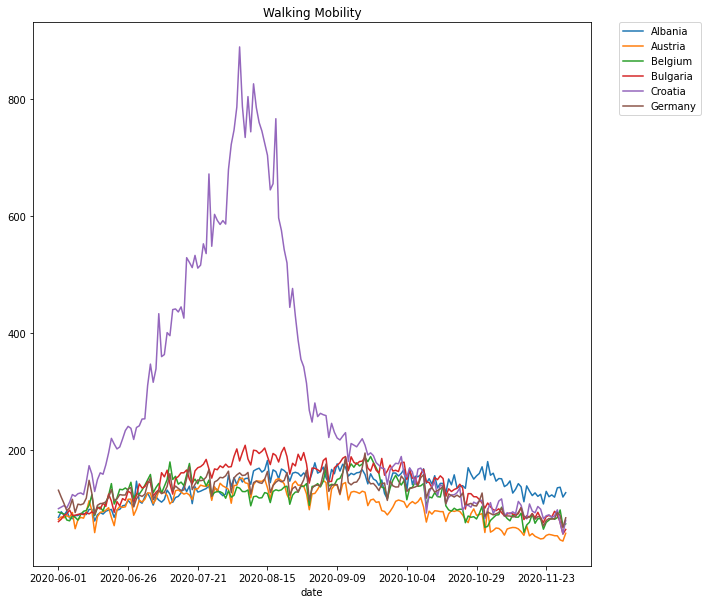

In [160]:
walking_df = europe_walking_df.walking
walking_df = walking_df.unstack()
walking_df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Walking Mobility")

Text(0.5, 1.0, 'Driving Mobility')

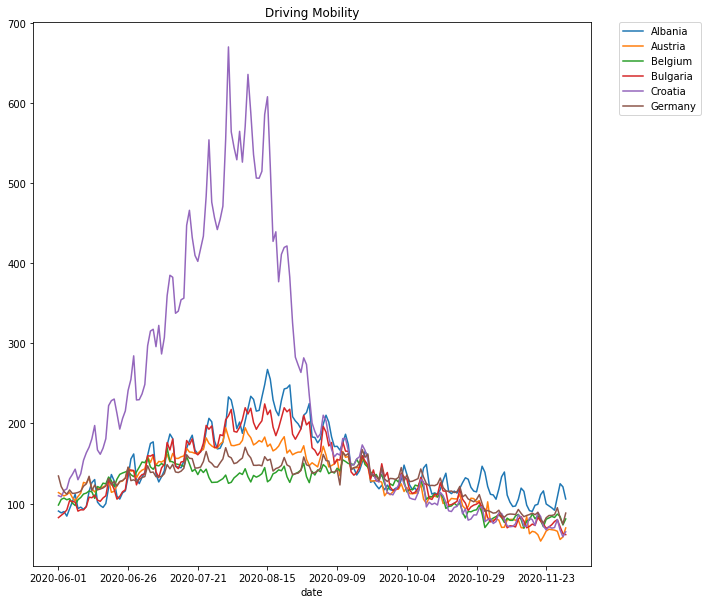

In [164]:
driving_df = europe_driving_df.driving
driving_df = driving_df.unstack()
driving_df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Driving Mobility")

Text(0.5, 1.0, 'Transit Mobility')

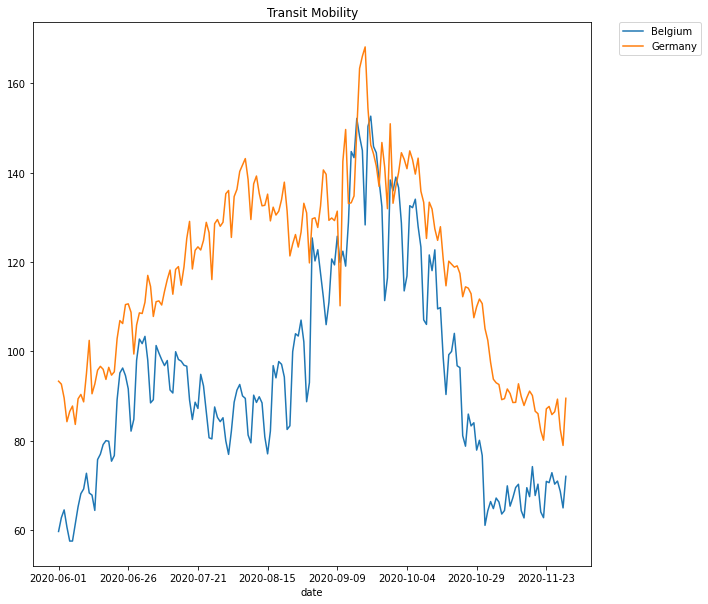

In [162]:
transit_df = europe_transit_df.transit
transit_df = transit_df.unstack()
transit_df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Transit Mobility")

In [154]:
europe_walking_df.sort_values('location')

,location,walking
date,,
2020-06-01,Albania,84.18
2020-07-08,Albania,110.19
2020-10-12,Albania,150.36
2020-07-09,Albania,114.84
2020-10-11,Albania,142.52
...,...,...
2020-11-03,Germany,90.77
2020-09-19,Germany,194.18
2020-06-20,Germany,131.78


In [152]:
europe_df.head()
#merged_df = 

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,Albania,1143.0,6.0,19.857,33.0,0.0,0.143,397.178,2.085,6.900,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2020-06-02,Albania,1164.0,21.0,19.286,33.0,0.0,0.000,404.476,7.297,6.702,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2020-06-03,Albania,1184.0,20.0,19.143,33.0,0.0,0.000,411.425,6.950,6.652,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2020-06-04,Albania,1197.0,13.0,17.286,33.0,0.0,0.000,415.943,4.517,6.007,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2020-06-05,Albania,1212.0,15.0,16.143,33.0,0.0,0.000,421.155,5.212,5.609,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
